### importing important libraries

In [2]:
import shap
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
from sklearn.metrics import RocCurveDisplay
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

c:\Users\hp\AppData\Local\Programs\Python\Python312\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


### loading data

In [3]:
address = "C:/Users/hp/Desktop/Kifya/Week_8&9/Data/raw/"
df = pd.read_csv(address + "creditcard.csv")
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


split the data

In [5]:
x = df.select_dtypes(include=['int', 'float']).drop(columns=['Class'], errors='ignore')
y = df['Class']
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [6]:
smote = SMOTE(random_state=42)
X_train, Y_train = smote.fit_resample(X_train, Y_train)

In [7]:
numerical_cols = x.select_dtypes(include=['int', 'float']).columns.tolist()
scaler = StandardScaler()
X_train[numerical_cols] = scaler.fit_transform(X_train[numerical_cols])
X_test[numerical_cols] = scaler.transform(X_test[numerical_cols])

train the models

In [8]:

Lr_model = LogisticRegression()
Random_model = RandomForestClassifier(n_estimators=100, random_state=42)

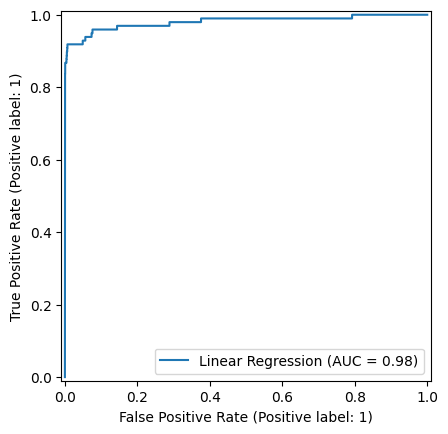

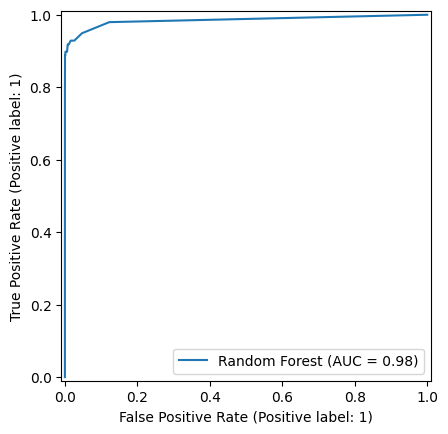

In [9]:
models = {
    "Linear Regression": Lr_model,
    "Random Forest": Random_model,
}

results = {}

for name, model in models.items():
    model.fit(X_train, Y_train)
    preds = model.predict(X_test)
    RocCurveDisplay.from_estimator(model, X_test, Y_test, name=name)

# Shaply Explainer

## Linear Regression

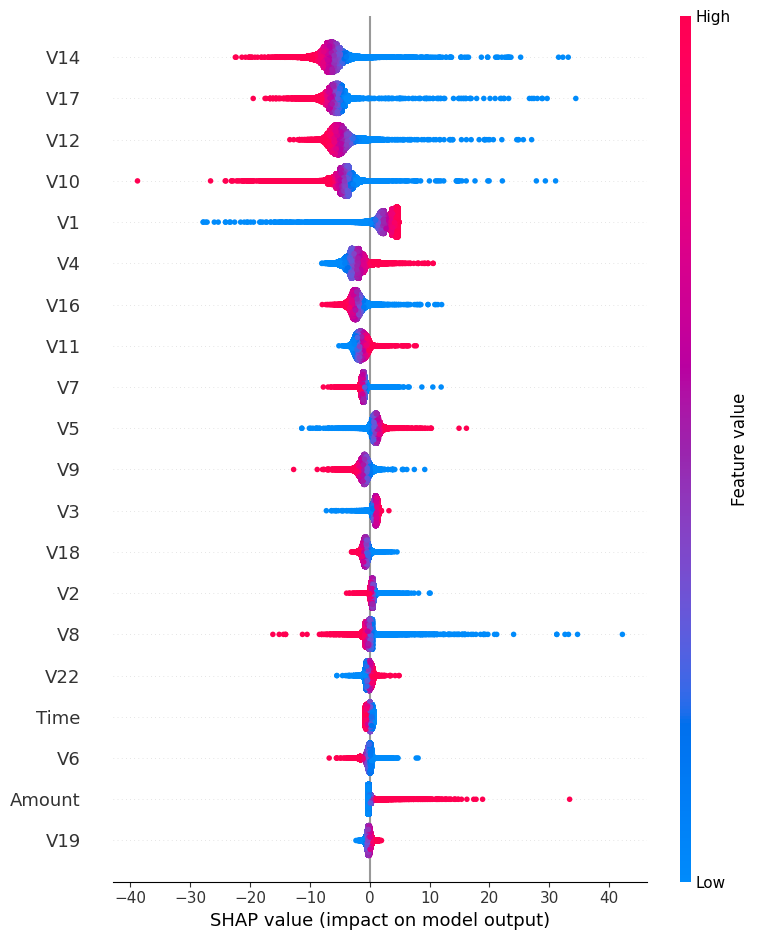

In [10]:
explainer = shap.Explainer(Lr_model, X_train)
shap_values = explainer(X_test)

shap.summary_plot(shap_values, X_test)

## Random Forest

In [11]:
explainer = shap.Explainer(Random_model,X_train)
shap_values = explainer(X_test)

shap.summary_plot(shap_values, X_test)

  9%|==                  | 10454/113924 [15:05<149:17]       